# <center> Decision Trees and k Nearest Neighbors


## 1. Decision Tree 
We begin our overview of classification methods with one of the popular algorithms – decision tree. Decision trees are used in everyday life decisions, not just in machine learning. Flow diagrams are actually visual representations of decision trees. For example, the Higher School of Economics publishes information diagrams to make the lives of its employees easier. Here is a snippet of instructions for publishing a paper on the Institution portal.

<img align='center' src='https://habrastorage.org/webt/wh/ty/tf/whtytf2hxotbnhymqno6vmcivr4.png' width=60%><br>

In terms of machine learning, one can see it as a simple classifier that determines the appropriate form of publication (book, article, chapter of the book, preprint, publication in the "Higher School of Economics and the Media") based on the content (book, pamphlet, paper), type of journal, original publication type (scientific journal, proceedings), etc.
 
A decision tree is often a generalization of an experts' experience, a means of sharing knowledge of a particular process. For example, before the introduction of scalable machine learning algorithms, the credit scoring task in the banking sector was solved by experts. The decision to grant a loan was made on the basis of some intuitively (or empirically) derived rules that could be represented as a decision tree.

<img src="https://habrastorage.org/webt/p4/lm/sh/p4lmshrp9wh_2locm5sei23h7qc.png"><br>

The decision tree as a machine learning algorithm is essentially the same thing as the diagram shown above; we incorporate a stream of logical rules of the form "feature $a$ value is less than $x$ and feature $b$ value is less than $y$ ... => Category 1" into a tree-like data structure. The advantage of this algorithm is that they are easily interpretable. For example, using the above scheme, the bank can explain to the client why they were denied for a loan: e.g the client does not own a house and her income is less than 5,000.

As we'll see later, many other models, although more accurate, do not have this property and can be regarded as more of a "black box" approach, where it is harder to interpret how the input data was transformed into the output. Due to this "understandability" and similarity to human decision-making (you can easily explain your model to your boss), decision trees have gained immense popularity. C4.5, a representative of this group of classification methods, is even the first in the list of 10 best data mining algorithms ("Top 10 Algorithms in Data Mining", Knowledge and Information Systems, 2008. [ResearchGate](https://www.researchgate.net/publication/29467751_Top_10_algorithms_in_data_mining)).

### How to Build a Decision Tree

Earlier, we saw that the decision to grant a loan is made based on age, assets, income, and other variables. But what variable to look at first? Let's discuss measurement function Entropy

#### Entropy
Shannon's entropy is defined for a system with N possible states as follows:

$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

where $p_i$ is the probability of finding the system in the $i$-th state. Entropy can be described as the degree of chaos in the system. The higher the entropy, the less ordered the system and vice versa. This will help us formalize "effective data splitting".

#### Toy Example
To illustrate how entropy can help us identify good features for building a decision tree, let's look at a toy example. We will predict the color of the ball based on its position.

<img align='center' src='https://habrastorage.org/webt/mu/vl/mt/muvlmtd2njeqf18trbldenpqvnm.png'><br>

There are 9 blue balls and 11 yellow balls. If we randomly pull out a ball, then it will be blue with probability $p_1=\frac{9}{20}$ and yellow with probability $p_2=\frac{11}{20}$, which gives us an entropy $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. This value by itself may not tell us much, but let's see how the value changes if we were to break the balls into two groups: with the position less than or equal to 12 and greater than 12.

<img align='center' src='https://habrastorage.org/webt/5k/ur/88/5kur88sfin6hoffp6ljbyktcur4.png'><br>


The left group has 13 balls, 8 blue and 5 yellow. The entropy of this group is $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. The right group has 7 balls, 1 blue and 6 yellow. The entropy of the right group is $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. As you can see, entropy has decreased in both groups, more so in the right group. Since entropy is, in fact, the degree of chaos (or uncertainty) in the system, the reduction in entropy is called information gain. Formally, the information gain (IG) for a split based on the variable $Q$ (in this example it's a variable "$x \leq 12$") is defined as

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where $q$ is the number of groups after the split, $N_i$ is number of objects from the sample in which variable $Q$ is equal to the $i$-th value. In our example, our split yielded two groups ($q = 2$), one with 13 elements ($N_1 = 13$), the other with 7 ($N_2 = 7$). Therefore, we can compute the information gain as

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

It turns out that dividing the balls into two groups by splitting on "coordinate is less than or equal to 12" gave us a more ordered system. Let's continue to divide them into groups until the balls in each group are all of the same color.

<img align='center' src='https://habrastorage.org/webt/o4/nx/p7/o4nxp7itpg_zxowtmffs5xh3bbw.png'><br>

For the right group, we can easily see that we only need one extra partition using "coordinate less than or equal to 18". But, for the left group, we need three more. Note that the entropy of a group where all of the balls are the same color is equal to 0 ($\log_2{1} = 0$).

We have successfully constructed a decision tree that predicts ball color based on its position. This decision tree may not work well if we add any balls because it has perfectly fit to the training set (initial 20 balls). If we wanted to do well in that case, a tree with fewer "questions" or splits would be more accurate, even if it does not perfectly fit the training set. We will discuss the problem of overfitting later. 

### Tree-building Algorithm

We can make sure that the tree built in the previous example is optimal: it took only 5 "questions" (conditioned on the variable $x$) to perfectly fit a decision tree to the training set. Under other split conditions, the resulting tree would be deeper, i.e. take more "questions" to reach an answer.
 
At the heart of the popular algorithms for decision tree construction, such as ID3 or C4.5, lies the principle of greedy maximization of information gain: at each step, the algorithm chooses the variable that gives the greatest information gain upon splitting. Then the procedure is repeated recursively until the entropy is zero (or some small value to account for overfitting). Different algorithms use different heuristics for "early stopping" or "cut-off" to avoid constructing an overfitted tree. 

### Other Quality Criteria for Splits in Classification Problems

We discussed how entropy allows us to formalize partitions in a tree. But this is only one heuristic; there exists others:

- Gini uncertainty (Gini impurity): $G = 1 - \sum\limits_k (p_k)^2$. Maximizing this criterion can be interpreted as the maximization of the number of pairs of objects of the same class that are in the same subtree (not to be confused with the Gini index).
- Misclassification error:  $E = 1 - \max\limits_k p_k$

In practice, misclassification error is almost never used, and Gini uncertainty and information gain work similarly.
 
For binary classification, entropy and Gini uncertainty take the following form:

$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$

$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$

where ($p_+$ is the probability of an object having a label +).

If we plot these two functions against the argument $p_+$, we will see that the entropy plot is very close to the plot of Gini uncertainty, doubled. Therefore, in practice, these two criteria are almost identical.

In [1]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

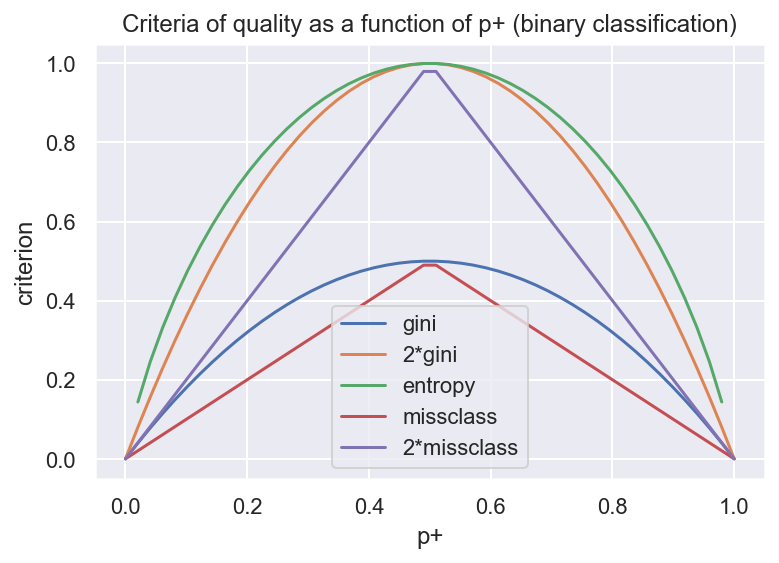

In [2]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend();

### Example [Synthetic Dataset]
Let's consider fitting a decision tree to some synthetic data. We will generate samples from two classes, both normal distributions but with different means.

In [3]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Let's plot the data. Informally, the classification problem in this case is to build some "good" boundary separating the two classes (the red dots from the yellow). Machine learning for this case boils down to choosing a good separating border. A straight line will be too simple while some complex curve snaking by each red dot will be too complex and will lead us to making mistakes on new samples. Intuitively, some smooth boundary, or at least a straight line or a hyperplane, would work well on new data.

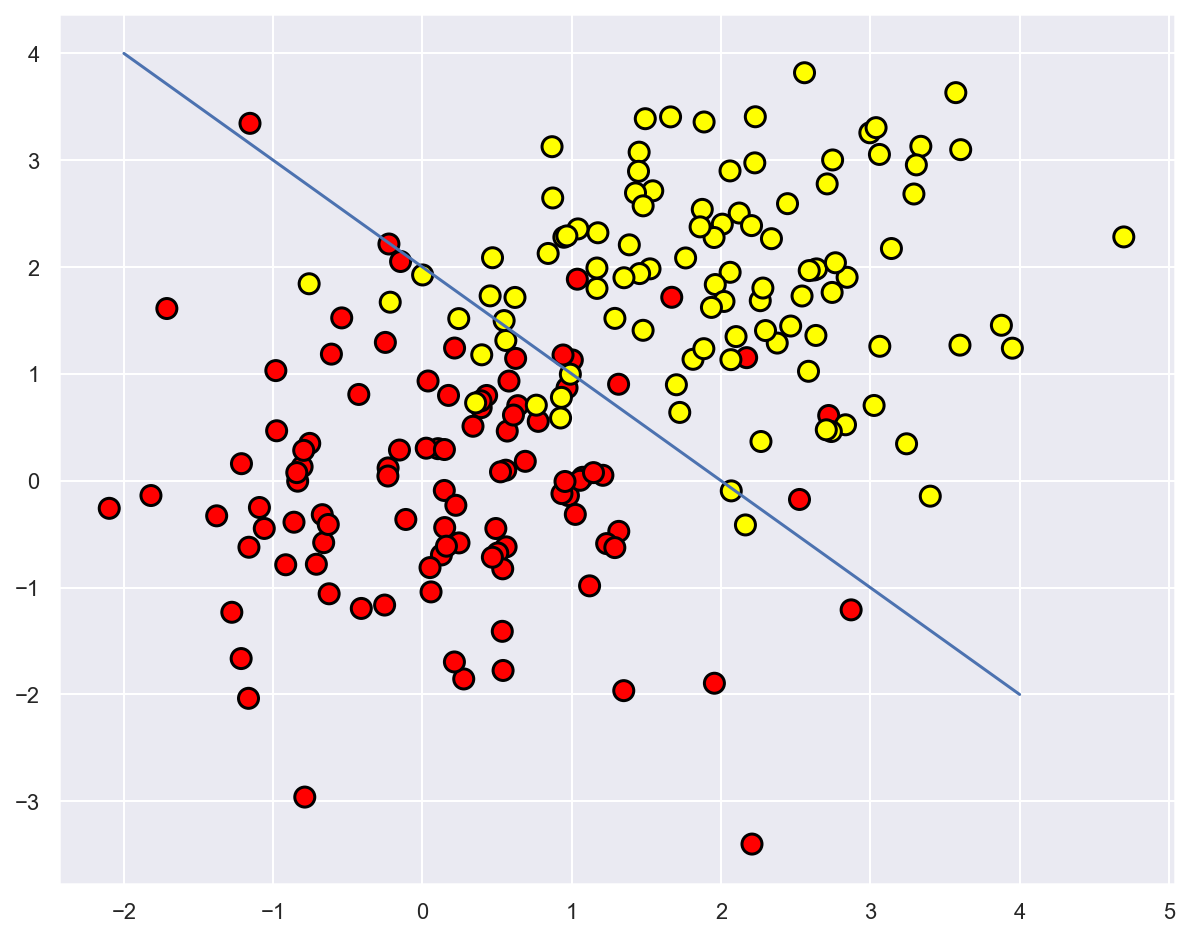

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));


### Class DecisionTreeClassifier in Scikit-learn
The main parameters of the [`sklearn.tree.DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class are:

- `max_depth` – the maximum depth of the tree;
- `criterion` - {“gini”, “entropy”}, default=”gini”
- `max_features` - the maximum number of features with which to search for the best partition (this is necessary with a large number of features because it would be "expensive" to search for partitions for *all* features);
- `min_samples_leaf` – the minimum number of samples in a leaf. This parameter prevents creating trees where any leaf would have only a few members.

The parameters of the tree need to be set depending on input data, and it is usually done by means of *cross-validation*, more on this later.

Let's try to separate these two classes by training an `Sklearn` decision tree. We will use `max_depth` parameter that limits the depth of the tree. Let's visualize the resulting separating boundary.

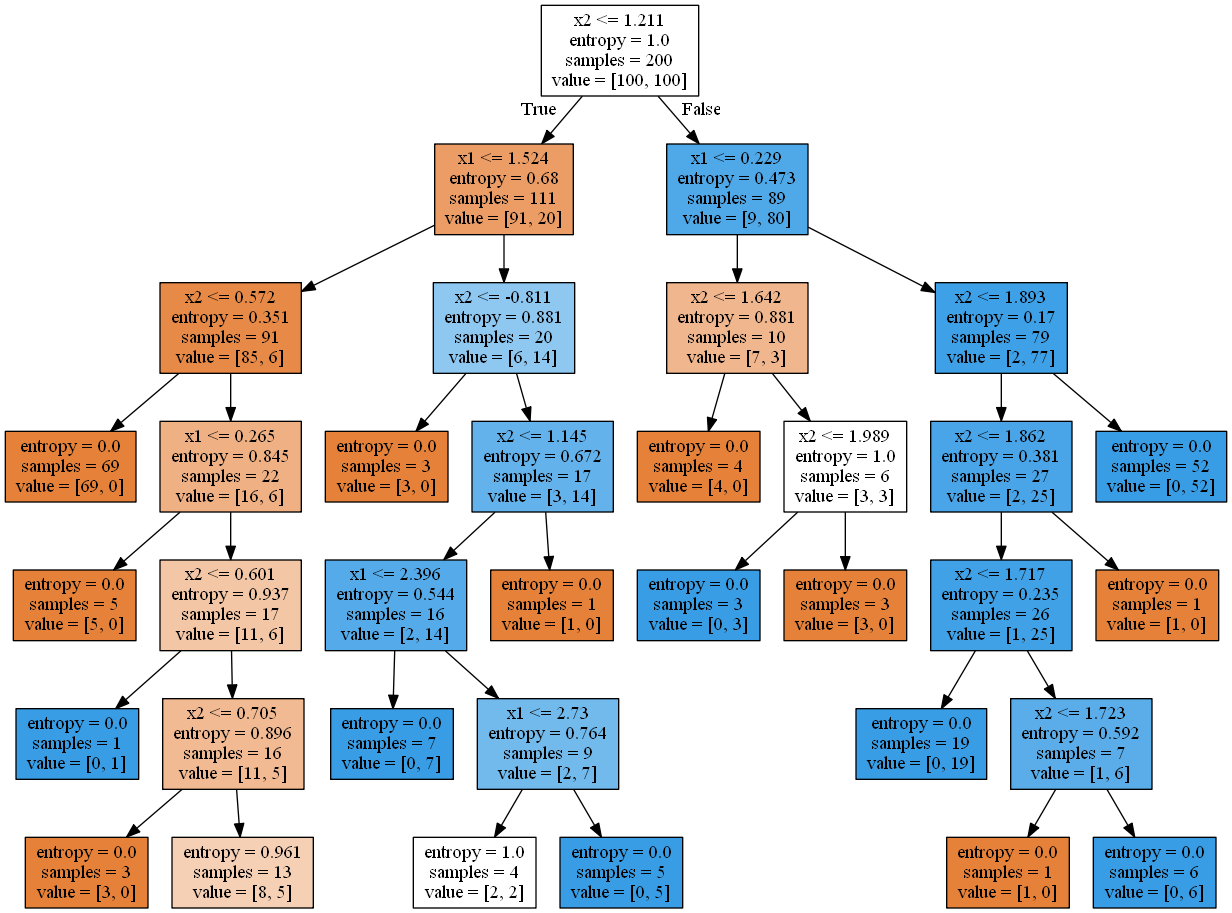

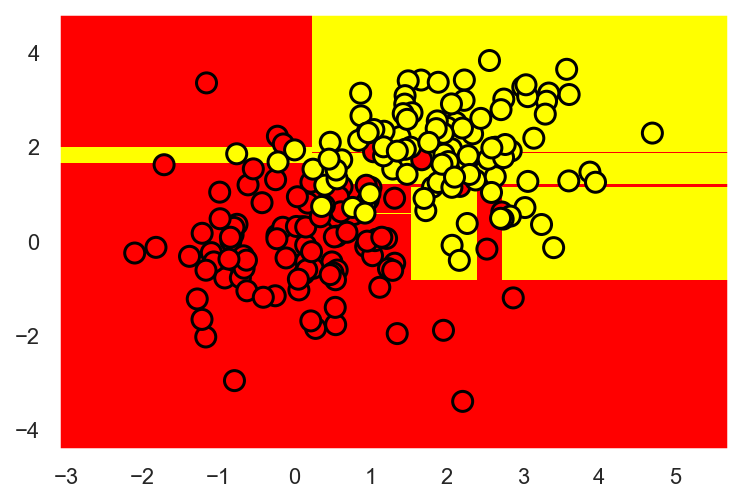

In [5]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


#For Assignment you have to change max_depth parameter and re-run the cell 

clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth= 6, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
                  png_file_to_save = 'topic3_tree1.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = 'topic3_tree1.png'
Image(filename = PATH , width=900, height=600)


And how does the tree itself look? We see that the tree "cuts" the space into 8 rectangles for max depth = 3, i.e. the tree has 8 leaves. Within each rectangle, the tree will make the prediction according to the majority label of the objects inside it.

#### How can we "read" such a tree?
**Explanation for tree with max_depth = 3**
In the beginning, there were 200 samples (instances), 100 of each class. The entropy of the initial state was maximal, $S=1$. Then, the first partition of the samples into 2 groups was made by comparing the value of $x_2$ with $1.211$ (find this part of the border in the picture above). With that, the entropy of both left and right groups decreased. The process continues up to depth 3. In this visualization, the more samples of the first class, the darker the orange color of the vertex; the more samples of the second class, the darker the blue. At the beginning, the number of samples from two classes is equal, so the root node of the tree is white.

### How a Decision Tree Works with Numerical Features  [Bank Dataset]

Suppose we have a numeric feature "Age" that has a lot of unique values. A decision tree will look for the best (according to some criterion of information gain) split by checking binary attributes such as "Age <17", "Age < 22.87", and so on. But what if the age range is large? Or what if another quantitative variable, "salary", can also be "cut" in many ways? There will be too many binary attributes to select from at each step during tree construction. To resolve this problem, heuristics are usually used to limit the number of thresholds to which we compare the quantitative variable.
 
Let's consider an example. Suppose we have the following dataset:

In [6]:
import pandas as pd
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                     'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Let's sort it by age in ascending order.

In [7]:
data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


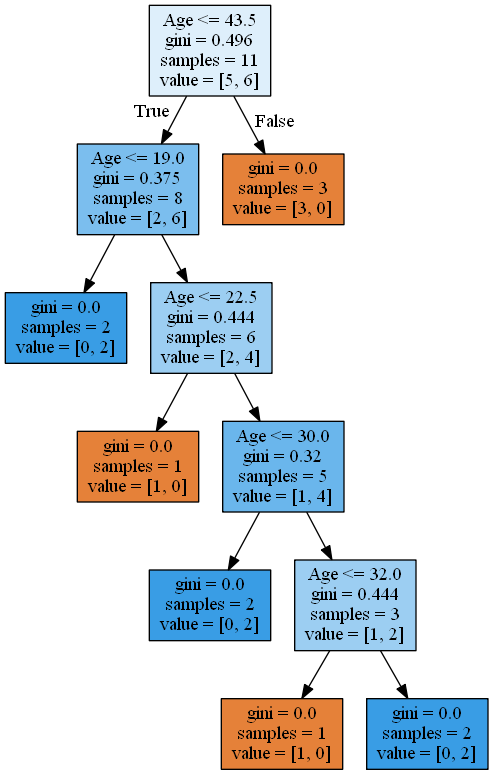

In [8]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

tree_graph_to_png(age_tree, feature_names=['Age'], png_file_to_save='topic3_decision_tree2.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree2.png"
Image(filename = PATH , width=500, height=200)

We see that the tree used the following 5 values to evaluate by age: 43.5, 19, 22.5, 30, and 32 years. If you look closely, these are exactly the mean values between the ages at which the target class "switches" from 1 to 0 or 0 to 1. To illustrate further, 43.5 is the average of 38 and 49 years; a 38-year-old customer failed to return the loan whereas the 49-year-old did. The tree looks for the values at which the target class switches its value as a threshold for "cutting" a quantitative variable.

**Conclusion**: the simplest heuristics for handling numeric features in a decision tree is to sort its values in ascending order and check only those thresholds where the value of the target variable changes.

## 2. Nearest Neighbors Method

*The nearest neighbors method* (k-Nearest Neighbors, or k-NN) is another very popular classification method. This, like decision trees, is also one of the most comprehensible approaches to classification. The underlying intuition is that you look like your nearest neighbors. 

According to the nearest neighbors method, the green ball would be classified as "blue" rather than "red".

<img src="https://habrastorage.org/webt/f-/bq/ey/f-bqeydaszcsrslhsmzkymb-y8s.png" />

For another example, if you do not know how to tag a Bluetooth-headset on an online listing, you can find 5 similar headsets, and, if 4 of them are tagged as "accessories" and only 1 as "Technology", then you will also  label it under "accessories".
 
To classify each sample from the test set, one needs to perform the following operations in order:
1. Calculate the distance to each of the samples in the training set.
2. Select $k$ samples from the training set with the minimal distance to them.
3. The class of the test sample will be the most frequent class among those $k$ nearest neighbors.
 
A notable feature of this approach is its laziness – calculations are only done during the prediction phase, when a test sample needs to be classified. No model is constructed from the training examples beforehand. In contrast, recall that for decision trees in the first half of this article the tree is constructed based on the training set, and the classification of test cases occurs relatively quickly by traversing through the tree.

The quality of classification/regression with k-NN depends on several parameters:

- The number of neighbors $k$.
- The distance measure between samples (common ones include Hamming, Euclidean, cosine, and Minkowski distances). Note that most of these metrics require data to be scaled. Simply speaking, we do not want the "salary" feature, which is on the order of thousands, to affect the distance more than "age", which is generally less than 100. 
- Weights of neighbors (each neighbor may contribute different weights; for example, the further the sample, the lower the weight).

### Class `KNeighborsClassifier` in Scikit-learn
The main parameters of the class `sklearn.neighbors.KNeighborsClassifier` are:
- weights: `uniform` (all weights are equal), `distance` (the weight is inversely proportional to the distance from the test sample), or any other user-defined function;
- algorithm (optional): `brute`, `ball_tree `, `KD_tree`, or `auto`. In the first case, the nearest neighbors for each test case are computed by a grid search over the training set. In the second and third cases, the distances between the examples are stored in a tree to accelerate finding nearest neighbors. If you set this parameter to `auto`, the right way to find the neighbors will be automatically chosen based on the training set.
- leaf_size (optional): threshold for switching to grid search if the algorithm for finding neighbors is BallTree or KDTree;
- metric: `minkowski`, `manhattan `, `euclidean`, `chebyshev`, or other.

## 4. Choosing Model Parameters and Cross-Validation 

The main task of learning algorithms is to be able to *generalize* to unseen data. Since we cannot immediately check the model performance on new, incoming data (because we do not know the true values of the target variable yet), it is necessary to sacrifice a small portion of the data to check the quality of the model on it.


This is often done in one of two ways:
- setting aside a part of the dataset (*held-out/hold-out set*). Thus we reserve a fraction of the training set (typically from 20% to 40%), train the model on the remaining data (60-80% of the original set), and compute performance metrics for the model (e.g accuracy) on the hold-out set.
- *cross-validation*. The most frequent case here is *k-fold cross-validation*.

<img src="https://habrastorage.org/webt/80/nx/1p/80nx1pa4iet33x9pw-bj02khyhs.png" />

In k-fold cross-validation, the model is trained $K$ times on different ($K-1$) subsets of the original dataset (in white) and checked on the remaining subset (each time a different one, shown above in orange).
We obtain $K$ model quality assessments that are usually averaged to give an overall average quality of classification.

Cross-validation provides a better assessment of the model quality on new data compared to the hold-out set approach. However, cross-validation is computationally expensive when you have a lot of data.
 
Cross-validation is a very important technique in machine learning and can also be applied in statistics and econometrics. It helps with hyperparameter tuning, model comparison, feature evaluation, etc. More details can be found [here](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) (blog post by Sebastian Raschka) or in any classic textbook on machine (statistical) learning.

## 3. Application Examples

### Decision trees and nearest neighbors method in a customer churn prediction task 

Let's read data into a `DataFrame` and preprocess it.  

In [9]:
df = pd.read_csv('telecom_churn.csv')

df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
df.drop(['state', 'churn','phone number'], axis=1, inplace=True)

In [10]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Let's allocate 70% of the set for training (`X_train`, `y_train`) and 30% for the hold-out set (`X_holdout`, `y_holdout`). The hold-out set will not be involved in tuning the parameters of the models. We'll use it at the end, after tuning, to assess the quality of the resulting model. Let's train 2 models: decision tree and k-NN. We do not know what parameters are good, so we will assume some random ones: a tree depth of 5 and the number of nearest neighbors equal 10.

In [11]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(random_state=17)
knn = KNeighborsClassifier(n_neighbors=5)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [12]:
d  = [[0, 0], [0, 0], [1, 1], [1, 1]]
d_scaled = scaler.fit_transform(d)
d_scaled

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

Let's assess prediction quality on our hold-out set with a simple metric, the proportion of correct answers (accuracy). The decision tree did better: the percentage of correct answers is about 94% (decision tree) versus 88% (k-NN). Note that this performance is achieved by using random parameters.

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


tree_pred = tree.predict(X_holdout)
print (f" Accuracy for decision tree is {accuracy_score(y_holdout, tree_pred)}") 

knn_pred = knn.predict(X_holdout_scaled)
print (f" Accuracy for k-nn is {accuracy_score(y_holdout, knn_pred)}")

 Accuracy for decision tree is 0.92
 Accuracy for k-nn is 0.892


## Underfitting and Overfitting

In [14]:
small_tree = DecisionTreeClassifier(max_depth = 2,random_state=17)
big_tree = DecisionTreeClassifier(max_depth = 8,random_state=17)



small_data_train , _, small_data_train_y, _ = train_test_split(X_train, y_train, 
                                                               test_size=0.9,random_state=17)
print (f"Small data shape is {small_data_train.shape,small_data_train_y.shape}")

big_data_train, big_data_train_y = X_train,y_train
print (f"Big data shape is {big_data_train.shape,big_data_train_y.shape}")

print (f"=================================================")
print (f"Results demonstrating underfitting and overfitting")
print (f"=================================================")

print ('\n')
small_tree.fit(small_data_train, small_data_train_y)
tree_pred_test = small_tree.predict(X_holdout)
tree_pred_train = small_tree.predict(small_data_train)
print (f" Train Accuracy for small decision tree trained on small data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')

big_tree.fit(small_data_train, small_data_train_y)
tree_pred_test = big_tree.predict(X_holdout)
tree_pred_train = big_tree.predict(small_data_train)
print (f" Train Accuracy for Large decision tree trained on small data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')

small_tree.fit(big_data_train, big_data_train_y)
tree_pred_test = small_tree.predict(X_holdout)
tree_pred_train = small_tree.predict(small_data_train)
print (f" Train Accuracy for small decision tree trained on Big data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 

print ('\n')
big_tree.fit(big_data_train, big_data_train_y)
tree_pred_test = big_tree.predict(X_holdout)
tree_pred_train = big_tree.predict(small_data_train)
print (f" Train Accuracy for Large decision tree trained on Big data is {accuracy_score(small_data_train_y, tree_pred_train)}, while test accuracy is  {accuracy_score(y_holdout, tree_pred_test)}") 


Small data shape is ((233, 18), (233,))
Big data shape is ((2333, 18), (2333,))
Results demonstrating underfitting and overfitting


 Train Accuracy for small decision tree trained on small data is 0.9012875536480687, while test accuracy is  0.884


 Train Accuracy for Large decision tree trained on small data is 0.9742489270386266, while test accuracy is  0.862


 Train Accuracy for small decision tree trained on Big data is 0.8884120171673819, while test accuracy is  0.881


 Train Accuracy for Large decision tree trained on Big data is 0.9570815450643777, while test accuracy is  0.944


## Imbalance Class


In [15]:
def count_0_1(arr):
    pos_count = np.count_nonzero(arr==1)
    neg_count = np.count_nonzero(arr==0)
    return pos_count, neg_count

def get_confusion_accuracy(a,b):
    cm = confusion_matrix(a, b)
    print (f"===============")
    print (cm)
    print (f"===============")
    return (accuracy_score(a, b))


tree = DecisionTreeClassifier(random_state=17)

train_pos_x = X_train[y_train==1]
train_neg_x =  X_train[y_train==0]

test_pos_x = X_holdout[y_holdout==1]
test_neg_x = X_holdout[y_holdout==0]

# print (train_pos_x.shape,train_neg_x.shape,test_pos_x.shape,test_neg_x.shape )

print (f"=================================================")
print (f"Balanced and Imbalanced dataset statistics")
print (f"=================================================")


balance_train_x, balance_train_y = np.concatenate((train_pos_x,train_neg_x[0:350])), np.concatenate(([1]*350,[0]*350))
pos_count, neg_count = count_0_1(balance_train_y)
print (f"For Balance Training Dataset, shape is {balance_train_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


imbalance_train_x, imbalance_train_y = np.concatenate((train_pos_x[0:10],train_neg_x)), np.concatenate(([1]*10,[0]*1983))
pos_count, neg_count = count_0_1(imbalance_train_y)
print (f"For ImBalance Training Dataset, shape is {imbalance_train_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


balance_test_x, balance_test_y = np.concatenate((test_pos_x,test_neg_x[0:133])), np.concatenate(([1]*133,[0]*133))
pos_count, neg_count = count_0_1(balance_test_y)
print (f"For Balance Testing Dataset, shape is {balance_test_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")


imbalance_test_x, imbalance_test_y = np.concatenate((test_pos_x[0:5],test_neg_x)), np.concatenate(([1]*5,[0]*867))
pos_count, neg_count = count_0_1(imbalance_test_y)
print (f"For ImBalance Testing Dataset, shape is {imbalance_test_x.shape} and we have {pos_count} positive class, and {neg_count} negative class")

print ('\n')


print (f"=================================================")
print (f"Train on balance and test on imbalance")
print (f"=================================================")

tree.fit(balance_train_x, balance_train_y)
tree_pred_test = tree.predict(imbalance_test_x)
tree_pred_train = tree.predict(balance_train_x)
print (f" Train Accuracy for decision tree trained on balanced data is {get_confusion_accuracy(balance_train_y, tree_pred_train)}, while test accuracy on imbalanced data is {get_confusion_accuracy(imbalance_test_y, tree_pred_test)}") 

print ('\n')

print (f"=================================================")
print (f"Train on balance and test on balance")
print (f"=================================================")
tree_pred_test = tree.predict(balance_test_x)
print (f" Train Accuracy for decision tree trained on balanced data is {get_confusion_accuracy(balance_train_y, tree_pred_train)}, while test accuracy on balanced data is {get_confusion_accuracy(balance_test_y, tree_pred_test)}") 

print ('\n')

print (f"=================================================")
print (f"Train on imbalance and test on balance")
print (f"=================================================")
tree.fit(imbalance_train_x, imbalance_train_y)
tree_pred_test = tree.predict(balance_test_x)
tree_pred_train = tree.predict(imbalance_train_x)
print (f" Train Accuracy for decision tree trained on imbalanced data is {get_confusion_accuracy(imbalance_train_y, tree_pred_train)}, while test accuracy on balanced data is {get_confusion_accuracy(balance_test_y, tree_pred_test)}") 


print ('\n')
print (f"=================================================")
print (f"Train on imbalance and test on imbalance")
print (f"=================================================")
tree_pred_test = tree.predict(imbalance_test_x)
print (f" Train Accuracy for decision tree trained on imbalanced data is {get_confusion_accuracy(imbalance_train_y, tree_pred_train)}, while test accuracy on imbalanced data is  {get_confusion_accuracy(imbalance_test_y, tree_pred_test)}") 





Balanced and Imbalanced dataset statistics
For Balance Training Dataset, shape is (700, 18) and we have 350 positive class, and 350 negative class
For ImBalance Training Dataset, shape is (1993, 18) and we have 10 positive class, and 1983 negative class
For Balance Testing Dataset, shape is (266, 18) and we have 133 positive class, and 133 negative class
For ImBalance Testing Dataset, shape is (872, 18) and we have 5 positive class, and 867 negative class


Train on balance and test on imbalance
[[350   0]
 [  0 350]]
[[688 179]
 [  0   5]]
 Train Accuracy for decision tree trained on balanced data is 1.0, while test accuracy on imbalanced data is 0.7947247706422018


Train on balance and test on balance
[[350   0]
 [  0 350]]
[[108  25]
 [ 30 103]]
 Train Accuracy for decision tree trained on balanced data is 1.0, while test accuracy on balanced data is 0.793233082706767


Train on imbalance and test on balance
[[1983    0]
 [   0   10]]
[[133   0]
 [112  21]]
 Train Accuracy for deci

## Adding irrelevant attributes


In [16]:
np.random.seed(17)

tree = DecisionTreeClassifier(random_state=17)

tree.fit(X_train, y_train)

print (f"=================================================")
print (f"Results without addition of irrelevant attributes")
print (f"=================================================")


tree_pred = tree.predict(X_holdout)
print (f" Accuracy of decision tree on test dataset {accuracy_score(y_holdout, tree_pred)}") 

tree_pred = tree.predict(X_train)
print (f" Accuracy for decision tree on training dataset {accuracy_score(y_train, tree_pred)}")


noise_train = np.expand_dims(np.random.normal(30,100,2333), axis=1) #noise train
noise_test = np.expand_dims(np.random.normal(500,200,1000), axis=1)  #noise test


X_train_noise = np.concatenate((X_train,noise_train),axis=1) #Adding irrelavant attribute to train
X_holdout_noise = np.concatenate((X_holdout,noise_test),axis=1) #Adding irrelavant attribute to test

tree.fit(X_train_noise, y_train) # Fitting decision tree 

print (f"=================================================")
print (f"Results with addition of irrelevant attributes")
print (f"=================================================")

tree_pred = tree.predict(X_holdout_noise)
print (f" Accuracy of decision tree on test dataset {accuracy_score(y_holdout, tree_pred)}") 

tree_pred = tree.predict(X_train_noise)
print (f" Accuracy for decision tree on training dataset {accuracy_score(y_train, tree_pred)}")

Results without addition of irrelevant attributes
 Accuracy of decision tree on test dataset 0.92
 Accuracy for decision tree on training dataset 1.0
Results with addition of irrelevant attributes
 Accuracy of decision tree on test dataset 0.884
 Accuracy for decision tree on training dataset 1.0


Now, let's identify the parameters for the tree using cross-validation. We'll tune the maximum depth and the maximum number of features used at each split using `GridSearchCV`. Here it how it works: for each unique pair of values of `max_depth` and `max_features`, it compute model performance with 5-fold cross-validation, and then select the best combination of parameters.

In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=10, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.2s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             n_jobs=-1, param_grid={'max_features': range(4, 19)},
             verbose=True)

Let's list the best parameters and the corresponding mean accuracy from cross-validation.

In [18]:
print (f"Best parameters are {tree_grid.best_params_}") 

Best parameters are {'max_features': 10}


In [19]:
tree_grid.best_score_ #0.94256322331761677

0.9198488683467223

In [20]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.911

Let's draw the resulting tree. Due to the fact that it is not entirely a toy example (its maximum depth is 6), the picture is not that small, but you can zoom in the picture. It is saved in the directory with the name 'topic3_decision_tree4.png', from where you are running this notebook. 

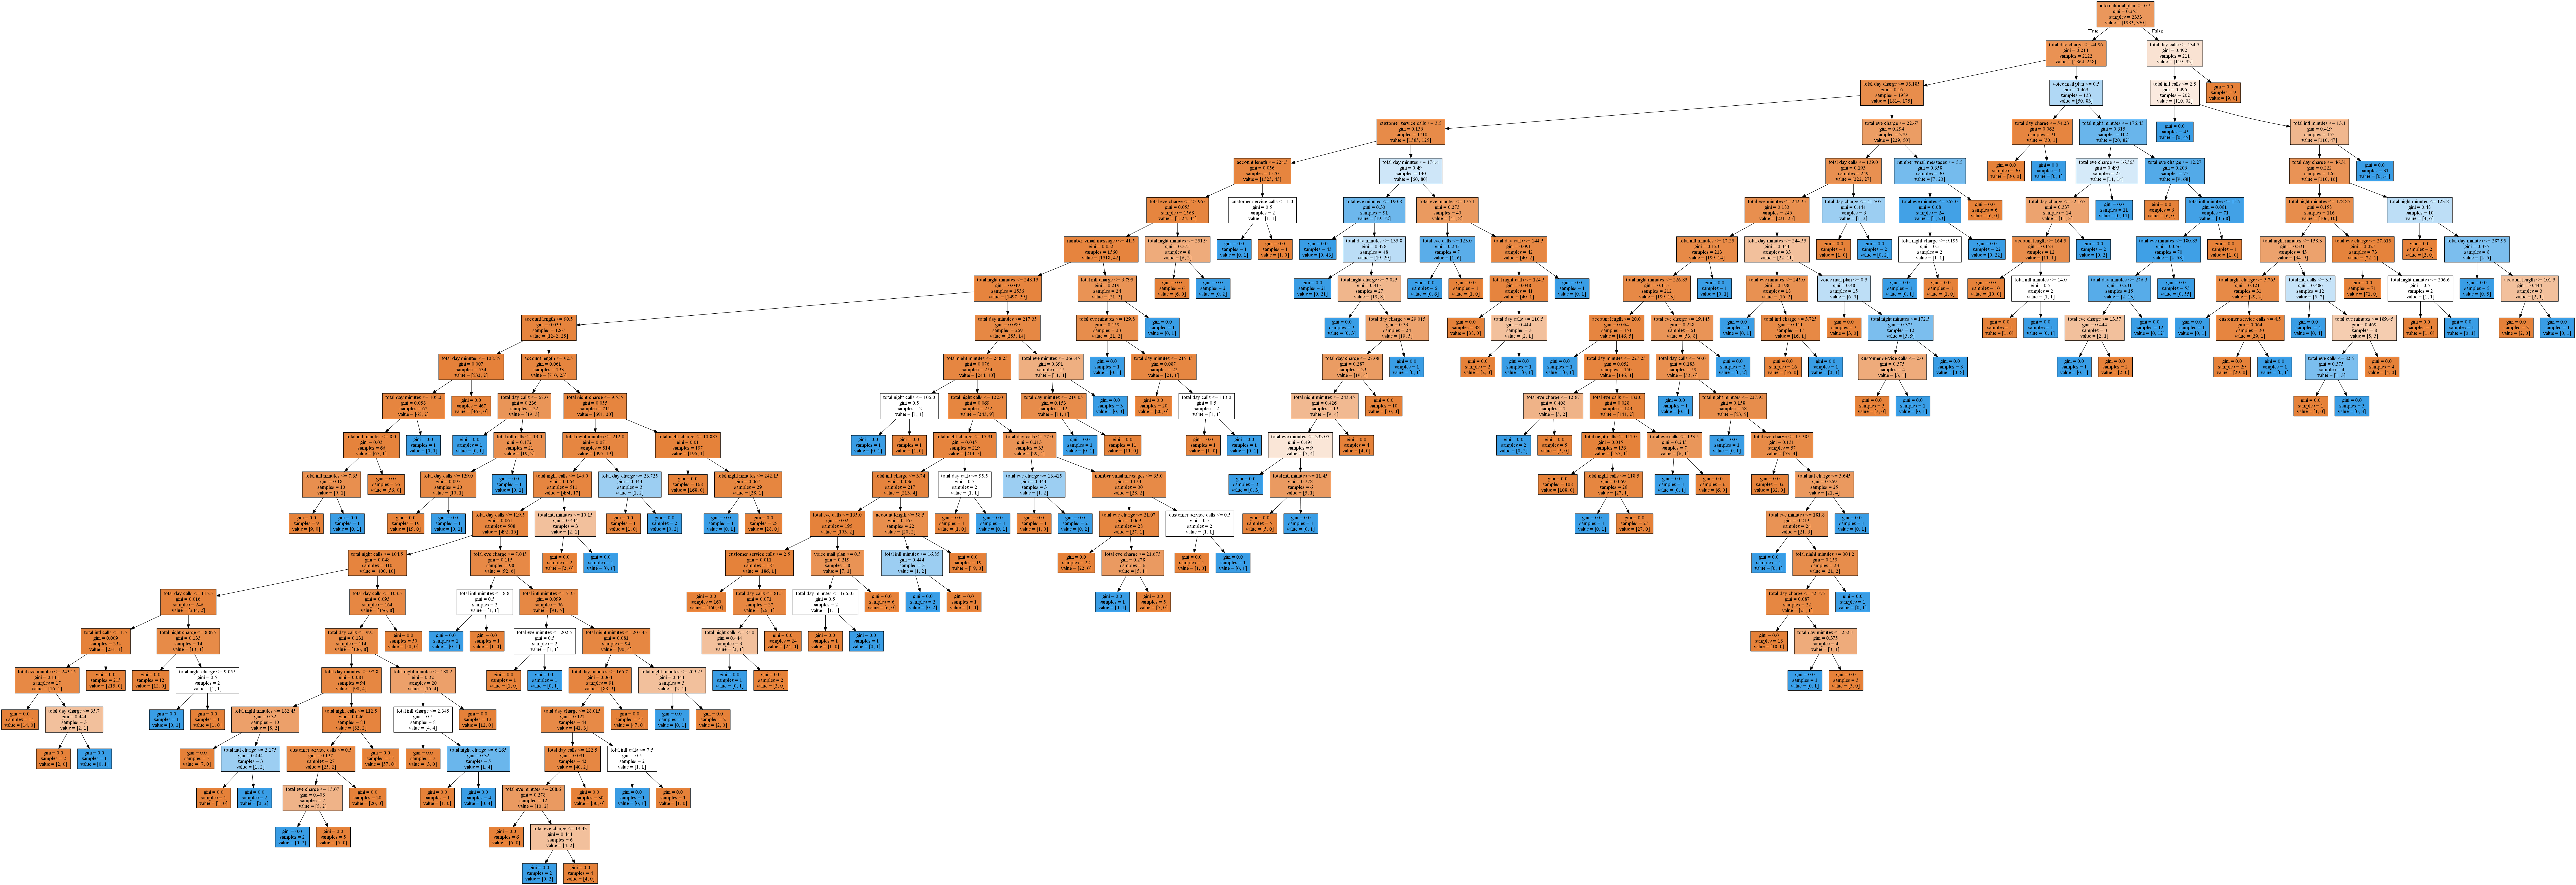

In [21]:
tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=df.columns, png_file_to_save='topic3_decision_tree4.png')


from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree4.png"
Image(filename = PATH , width=900, height=900)

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=10, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

print (f"Best parameters are {tree_grid.best_params_}") 

tree_grid.best_score_ #0.94256322331761677

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:    2.7s


Best parameters are {'max_depth': 6, 'max_features': 16}


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.0s finished


0.9447048897692675

Now, let's tune the number of neighbors $k$ for k-NN:

In [23]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


({'knn__n_neighbors': 9}, 0.8868383404864092)

In [24]:
print (f"Best parameters are {knn_grid.best_params_}") 

Best parameters are {'knn__n_neighbors': 9}


In [25]:
knn_grid.best_score_

0.8868383404864092

In [26]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout)) 

0.891

Here, the tree proved to be better than the nearest neighbors algorithm: 94.2%/94.6% accuracy for cross-validation and hold-out respectively. 

In [27]:
print (f"Best parameters are {knn_grid.best_params_}") 
knn_grid.best_score_
accuracy_score(y_holdout, knn_grid.predict(X_holdout)) 

Best parameters are {'knn__n_neighbors': 9}


0.891

### Complex Case for Decision Trees

To continue the discussion of the pros and cons of the methods in question, let's consider a simple classification task, where a tree would perform well but does it in an "overly complicated" manner. Let's create a set of points on a plane (2 features), each point will be one of two classes (+1 for red, or -1 for yellow). If you look at it as a classification problem, it seems very simple: the classes are separated by a line. 

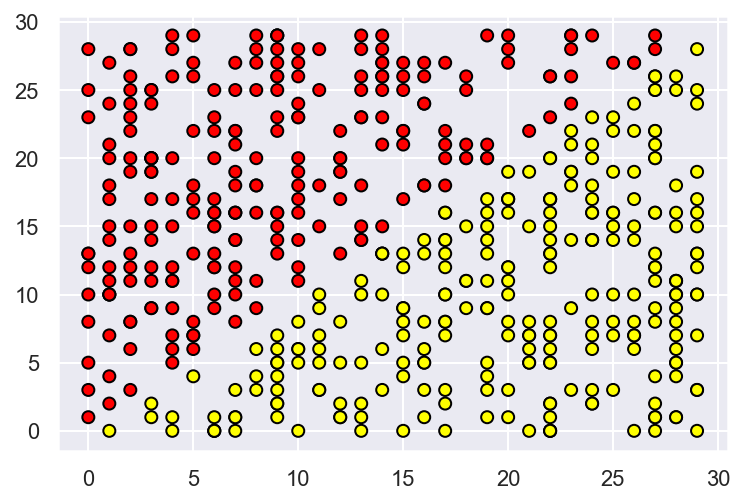

In [28]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, 
                                 x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

However, the border that the decision tree builds is too complicated; plus the tree itself is very deep. Also, imagine how badly the tree will generalize to the space beyond the $30 \times 30$ squares that frame the training set.

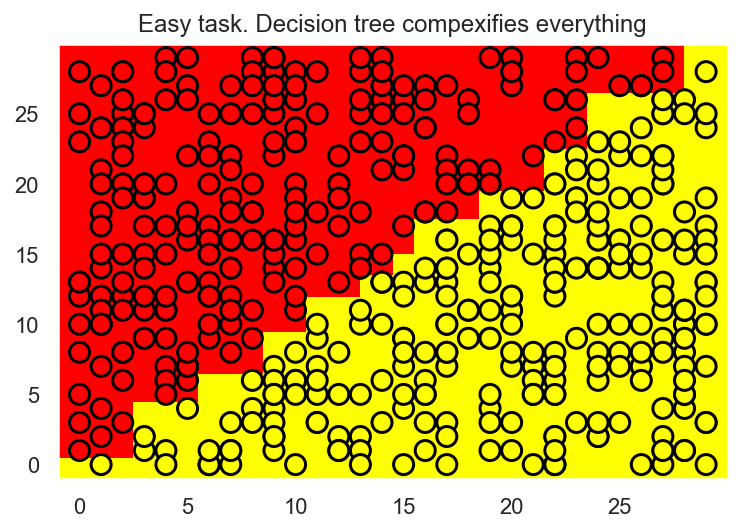

In [29]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

We got this overly complex construction, although the solution is just a straight line $x_1 = x_2$.

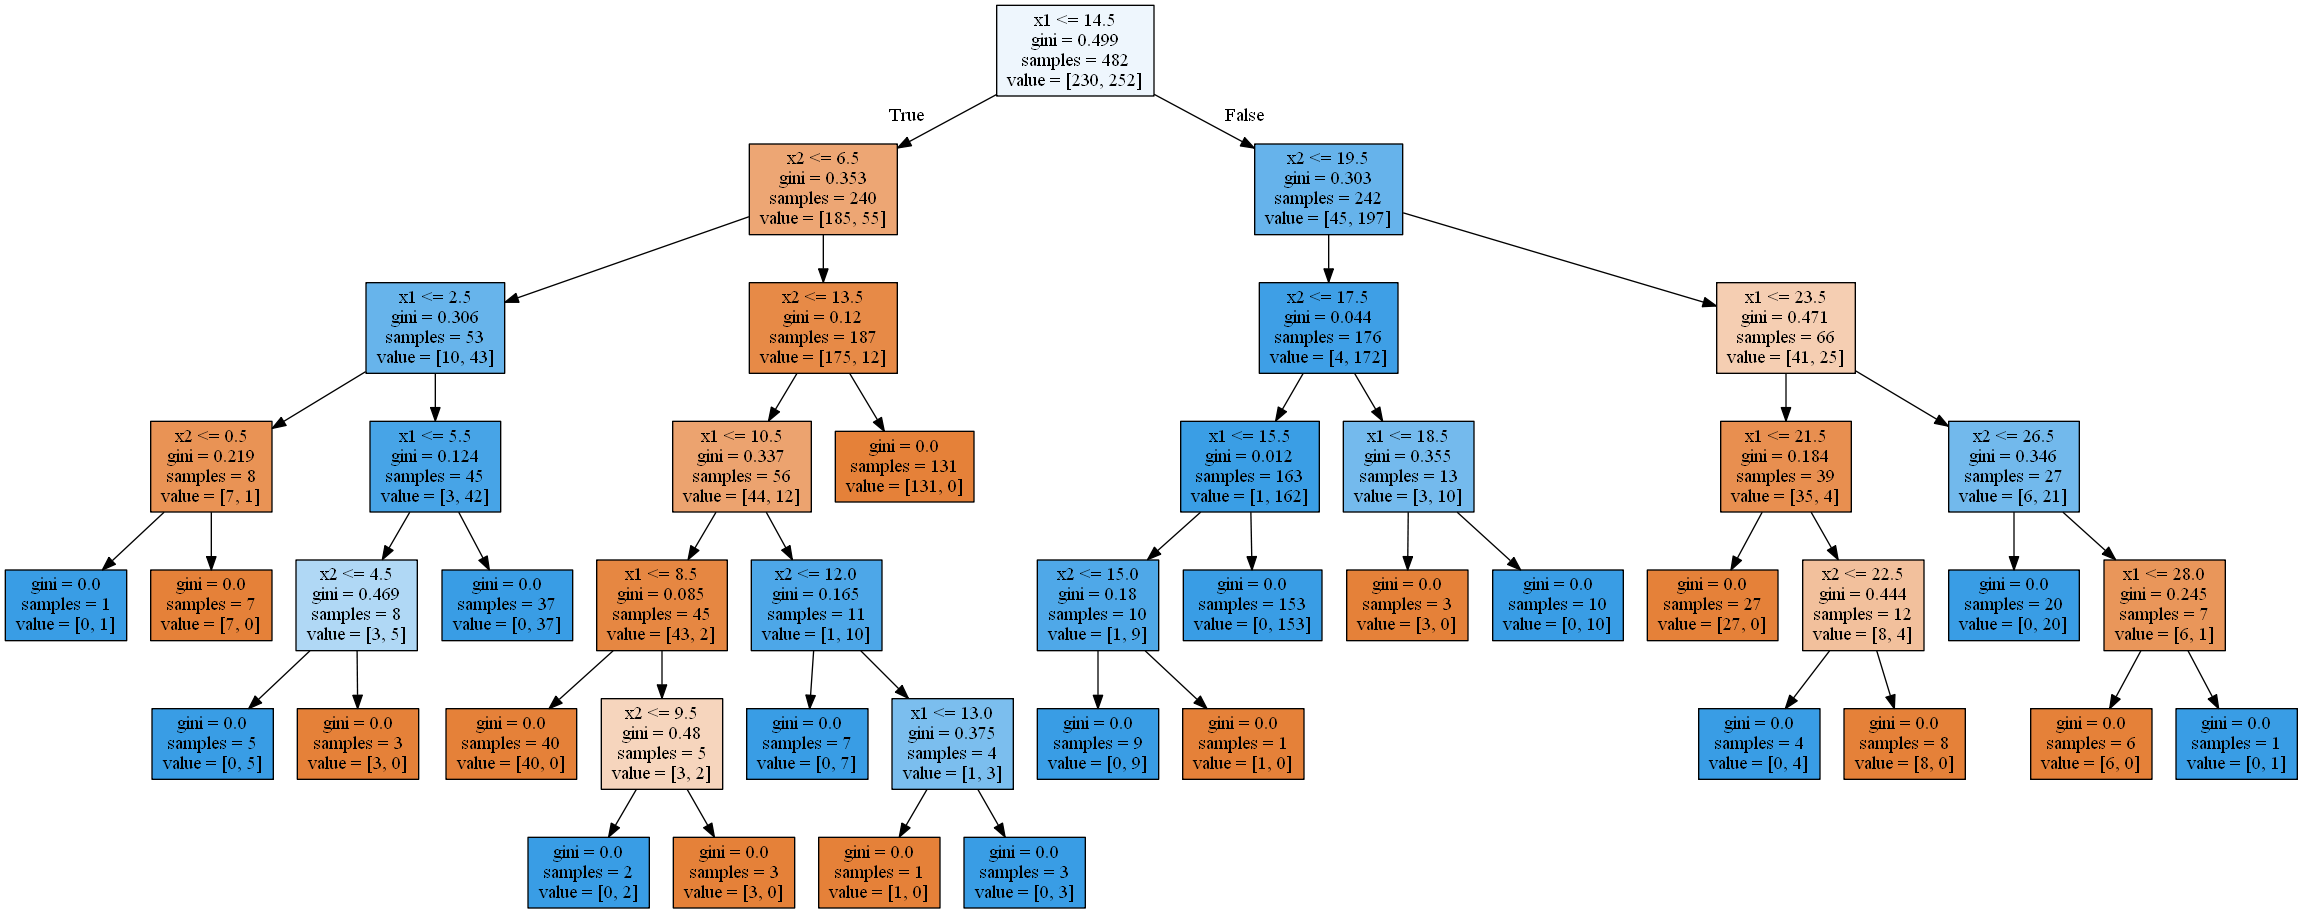

In [30]:
tree_graph_to_png(tree=tree, feature_names=['x1', 'x2'], png_file_to_save='topic3_decision_tree5.png')


from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree5.png"
Image(filename = PATH , width=800, height=800)

The method of one nearest neighbor does better than the tree. The following cell will take approx 4-5 minutes to run. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,n_jobs = -1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Easy task, kNN. Not bad');

###  Decision Trees and k-NN in a Task of MNIST Handwritten Digits Recognition

Now let's have a look at how these 2 algorithms perform on a real-world task. We will use the `sklearn` built-in dataset on handwritten digits. This task is an example where k-NN works surprisingly well.
 
Pictures here are 8x8 matrices (intensity of white color for each pixel). Then each such matrix is "unfolded" into a vector of length 64, and we obtain a feature description of an object.
 
Let's draw some handwritten digits. We see that they are distinguishable.

In [ ]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

In [ ]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

Next, let's do the same experiment as in the previous task, but, this time, let's change the ranges for tunable parameters.

Let's select 70% of the dataset for training (`X_train`, `y_train`) and 30% for holdout (`X_holdout`, `y_holdout`). The holdout set will not participate in model parameters tuning; we will use it at the end to check the quality of the resulting model.

In [ ]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

Let’s train a decision tree and k-NN with our random parameters.

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10))])

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

Now let’s make predictions on our holdout set. We can see that k-NN did much better, but note that this is with random parameters.  

In [ ]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
print (f"K-Nearest neighbor accuracy is {accuracy_score(y_holdout, knn_pred)}")
print (f"Decision tree accuracy is {accuracy_score(y_holdout, tree_pred)}")

Now let’s tune our model parameters using cross-validation as before, but now we’ll take into account that we have more features than in the previous task: 64. 

In [ ]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Let's see the best parameters combination and the corresponding accuracy from cross-validation:



In [ ]:
tree_grid.best_params_, tree_grid.best_score_ 

In [ ]:
print (f"Decision tree accuracy is {accuracy_score(y_holdout,  tree_grid.predict(X_holdout))}") 

That has already passed 66% but not quite 97%. kNN works better on this dataset. In the case of one nearest neighbor, we were able to reach 99% guesses on cross-validation.  

In [ ]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) 

Results
*(Legend: CV and Holdout are average shares of the correct answers on cross-model validation and hold-out sample. DT stands for a decision tree, k-NN stands for k-nearest neighbors.

|   algo\eval      |   CV  | Holdout |  
|---------|-------|---------|
| **DT**  | 0.844 |  0.838  |  
| **kNN** | 0.987 |  0.983  |

The **conclusion** of this experiment (and general advice): first check simple models on your data: decision tree and nearest neighbors. It might be the case that these methods already work well enough.

## 6. Pros and Cons of Decision Trees and the Nearest Neighbors Method

### Decision trees

Pros:
- Generation of clear human-understandable classification rules, e.g. "if age <25 and is interested in motorcycles, deny the loan". This property is called interpretability of the model.
- Decision trees can be easily visualized, i.e. both the model itself (the tree) and prediction for a certain test object (a path in the tree) can "be interpreted".
- Fast training and forecasting.
- Small number of model parameters.
- Supports both numerical and categorical features.

Cons:
 
- The trees are very sensitive to the noise in input data; the whole model could change if the training set is slightly modified (e.g. remove a feature, add some objects). This impairs the interpretability of the model.
- Separating border built by a decision tree has its limitations – it consists of hyperplanes perpendicular to one of the coordinate axes, which is inferior in quality to some other methods, in practice.
- We need to avoid overfitting by pruning, setting a minimum number of samples in each leaf, or defining a maximum depth for the tree. Note that overfitting is an issue for all machine learning methods.
- Instability. Small changes to the data can significantly change the decision tree. This problem is tackled with decision tree ensembles (discussed next time).
- The optimal decision tree search problem is NP-complete. Some heuristics are used in practice such as greedy search for a feature with maximum information gain, but it does not guarantee finding the globally optimal tree.

### The nearest neighbors method

Pros:
- Simple implementation;
- Good interpretability. There are exceptions: if the number of neighbors is large, the interpretability deteriorates ("We did not give him a loan, because he is similar to the 350 clients, of which 70 are the bad, and that is 12% higher than the average for the dataset").

Cons:
- Method considered fast in comparison with compositions of algorithms, but the number of neighbors used for classification is usually large (100-150) in real life, in which case the algorithm will not operate as fast as a decision tree.
- If a dataset has many variables, it is difficult to find the right weights and to determine which features are not important for classification/regression.
- Dependency on the selected distance metric between the objects. Selecting the Euclidean distance by default is often unfounded. You can find a good solution by grid searching over parameters, but this becomes very time consuming for large datasets.
- There are no theoretical ways to choose the number of neighbors – only grid search (though this is often true for all hyperparameters of all models). In the case of a small number of neighbors, the method is sensitive to outliers, that is, it is inclined to overfit.

This notebook is adaption from the following kaggle notebook https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn.